<a href="https://colab.research.google.com/github/juanmanuelvillacis/lab_time_series/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [4]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [5]:
# Run this code:

sensor = pd.read_csv('/content/drive/MyDrive/Iron Hack/LABs/csv_docs/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)


Examine the data using the `head` function.

In [6]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [7]:
# Your code here:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [8]:
# Your code here:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [9]:
# Your code here:
time = pd.date_range(start='1/1/2018 00:00:00',end='1/1/2018 00:29:10',periods = len(sensor))

Assign the time series index to the dataframe's index.

In [10]:
# Your code here:
new_index = {}
for i,t in enumerate(time):
  new_index[i]=t

In [11]:
sensor.rename(new_index,inplace=True)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](https://drive.google.com/uc?export=view&id=1-7F0F43qKuqocj3lcZYiWIzdFovmeIfz)

In [12]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1080x720 with 0 Axes>

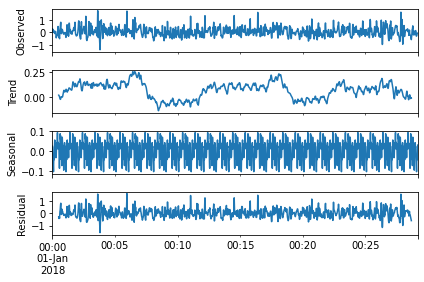

In [13]:
fig = plt.figure(figsize=[15, 10])
decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model='additive',freq=60)
fig = decomposition.plot()
plt.show();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<Figure size 1080x720 with 0 Axes>

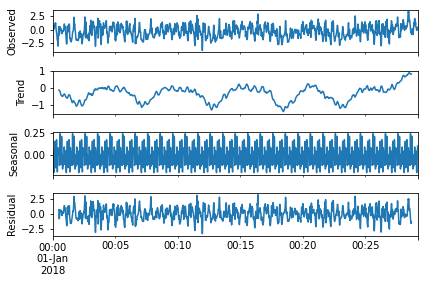

In [14]:
fig = plt.figure(figsize=[15, 10])
decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model='additive',freq=60)
fig = decomposition.plot()
plt.show();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

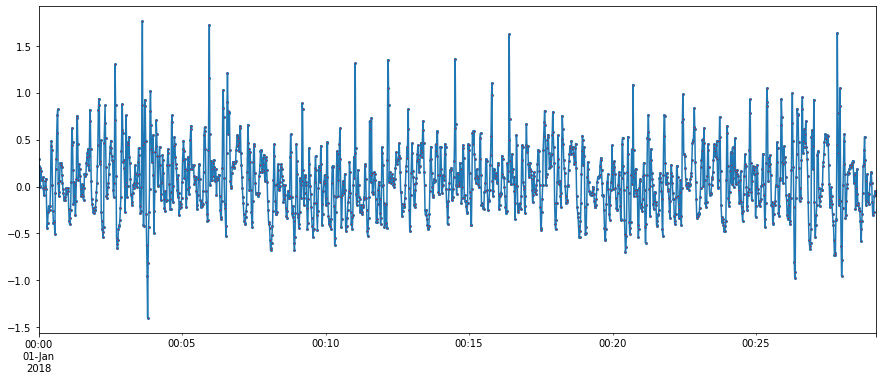

In [15]:
# Your code here:

sensor['userAcceleration.x'].plot(figsize=[15, 6], marker='o', markersize=2, markerfacecolor='r')


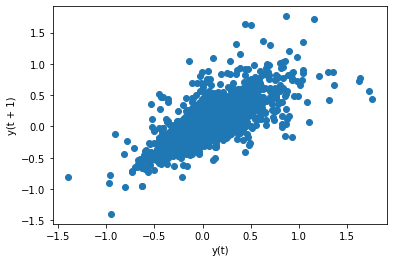

In [16]:
from pandas.plotting import lag_plot
lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

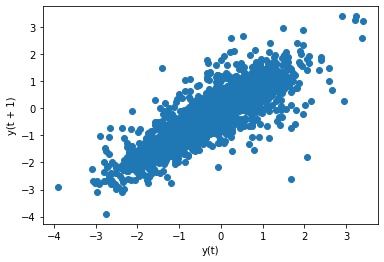

In [17]:
lag_plot(sensor['rotationRate.x']);

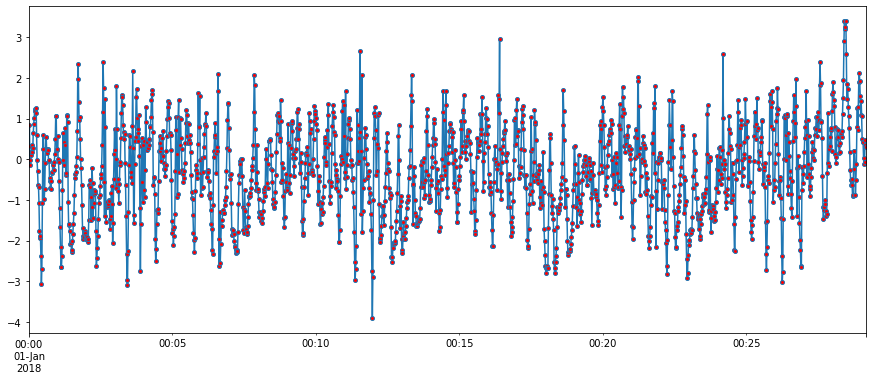

In [18]:
sensor['rotationRate.x'].plot(figsize=[15, 6], marker='o', markersize=4, markerfacecolor='r')

In [19]:
from pylab import rcParams

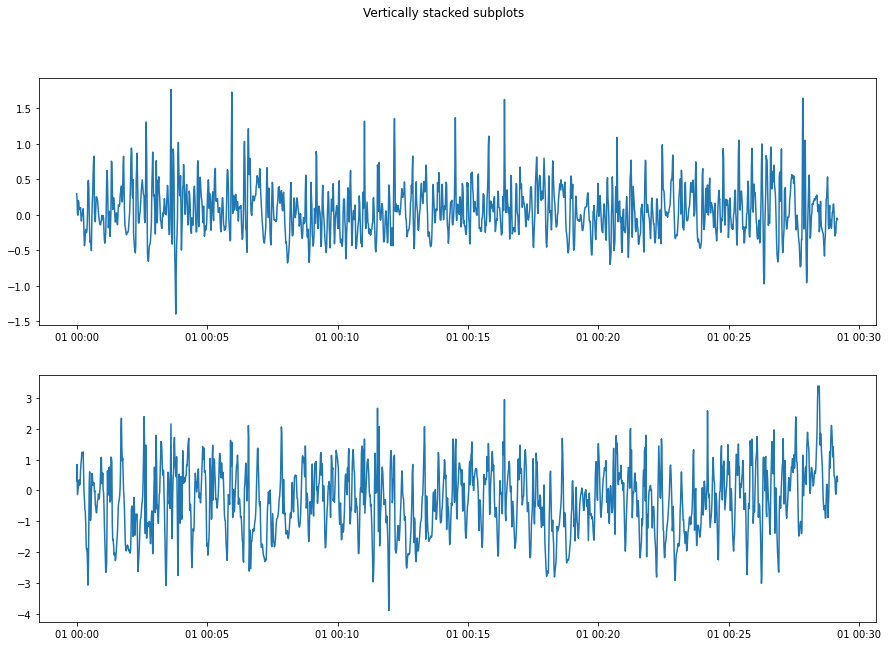

In [20]:
# Your code here:
rcParams['figure.figsize'] = 15, 10
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(sensor.index, sensor['userAcceleration.x'])
ax2.plot(sensor.index, sensor['rotationRate.x']);

What are your conclusions from both visualizations?

In [21]:
# Your conclusions here:
#In both graphs we se a positive correlation


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# Your code here:
test_adf1 = adfuller(sensor['userAcceleration.x']) 
test_adf2 = adfuller(sensor['rotationRate.x']) 
test_adf1, test_adf2


((-17.95799408616976,
  2.823439483037483e-30,
  4,
  1746,
  {'1%': -3.434100824760071,
   '10%': -2.5676520210882936,
   '5%': -2.863196780129223},
  -727.6140124402791),
 (-5.269860625086421,
  6.320230335912189e-06,
  25,
  1725,
  {'1%': -3.4341465551936534,
   '10%': -2.567662770090317,
   '5%': -2.863216966926812},
  2619.6049719981947))

What are your conclusions from this test?

In [24]:
# Your conclusions here:
'''
The nule hypothesis can be rejected, meaning that the time series is stationary. 
Because of the critical values (-17.95 and -5.26) are lower than 3.57 and the p value is lower tahn 0.01
'''


'\nThe nule hypothesis can be rejected, meaning that the time series is stationary. \nBecause of the critical values (-17.95 and -5.26) are lower than 3.57 and the p value is lower tahn 0.01\n'

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [28]:
from statsmodels.tsa.arima_model import ARMA

train, test = sensor["userAcceleration.x"][:-10], sensor["userAcceleration.x"][-10:]

model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(train), len(sensor["userAcceleration.x"])-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


In [29]:
# Your code here:
pd.DataFrame({'observed':test, 'predicted':predictions})



,observed,predicted
2018-01-01 00:29:01,0.149749,0.173149
2018-01-01 00:29:02,0.038461,0.142896
2018-01-01 00:29:03,-0.169175,0.100522
2018-01-01 00:29:04,-0.300361,0.070106
2018-01-01 00:29:05,-0.270174,0.056099
2018-01-01 00:29:06,-0.268367,0.053778
2018-01-01 00:29:07,-0.102444,0.056790
2018-01-01 00:29:08,-0.085590,0.060646
2018-01-01 00:29:09,-0.048105,0.063316
2018-01-01 00:29:10,-0.065011,0.064493


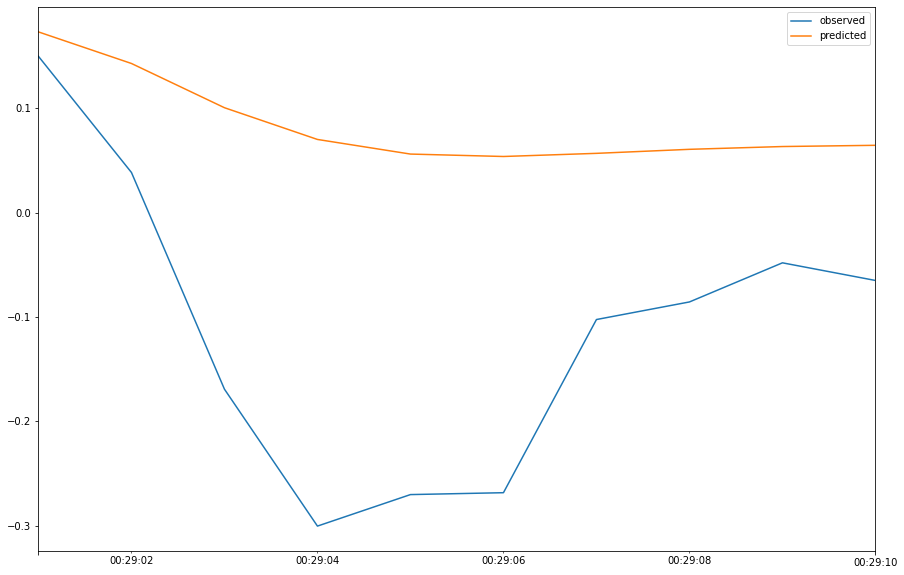

In [30]:
pd.DataFrame({'observed':test, 'predicted':predictions}).plot()


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [31]:
# Your code here:
from statsmodels.tools import eval_measures
eval_measures.rmse(test, predictions)

0.22529863971115618